In [1]:
#import necessary libraries
import ipywidgets as widgets
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from xml.dom import minidom

import numpy as np
from scipy import interpolate
import pylab as pl

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np

np.set_printoptions(threshold=np.inf)

#initializations
init_notebook_mode(connected=True)

In [2]:
#import data
filename = '20180808_Test_1'
# filename = '20180622_Test_2'
findLabel = 'Packet'
SensorData = None
time = 0

#import xml-file
xDoc = minidom.parse(filename + ".xml")
allListitems = xDoc.getElementsByTagName(findLabel) 

for s in allListitems:
    if SensorData is None:
        SensorData = s.attributes['Samples'].value.split(',')
    else:
        SensorData = np.append(SensorData, s.attributes['Samples'].value.split(','))

#import csv-file
ForceData = pd.read_csv(filename + ".csv",delimiter=',')
# column_cssj = column_cssj.set_index("State", drop = False)

In [3]:
len(SensorData)

1897

In [4]:
len(ForceData["cssj"][1:])

2429

In [5]:
#create sliders
timemult = widgets.FloatSlider(
    value=0.393,
    min=0.390,
    max=0.400,
    step=0.001,
    continuous_update = False)

valuemult = widgets.FloatSlider(
    value=55,
    min=1,
    max=200,
    step=1,
    continuous_update = False)

valueoffset = widgets.FloatSlider(
    value=1900,
    min=1000,
    max=3000,
    step=5,
    continuous_update = False)

timeoffset = widgets.FloatSlider(
    value=0,
    min=-10,
    max=10,
    step=0.1,
    continuous_update = False)

#create figure
figure = {
    'data': [],
    'layout': {},
    #'frames': [],
}

In [6]:
def update_plot(timemult,valuemult,valueoffset,timeoffset):
    #assign data
    trace1 = go.Scattergl(
        x = np.linspace(0, (len(SensorData)-1)/10, num=len(SensorData)),
        y = SensorData,
        name =" Sensor Data",
        mode = 'line',
        marker = dict(
        color = 'blue',
#         line = dict(width = 1)
    )
        )

    trace2 = go.Scattergl(
        x =  ForceData['cstm']*timemult+timeoffset,
        y =  ForceData['cssj']*valuemult+valueoffset,
        name = "Force Data",
         mode = 'line',
        marker = dict(
        color = 'red',
#         line = dict(width = 1)
    )
        )
    
    figure['data'] =[trace1,trace2]
    
    #set layout
    figure['layout'] = {
        'title': 'Data',
            'xaxis': {'title': 'Time [s]'},
            'yaxis': {'title': 'Sensor Data (mV)'}}
    
    #draw plot
    iplot(figure, filename='axes-booleans')

In [7]:
ForceData["cstm"][1:len(SensorData)].values

array([0.000e+00, 2.000e-01, 4.000e-01, 6.000e-01, 8.000e-01, 1.000e+00,
       1.200e+00, 1.400e+00, 1.600e+00, 1.800e+00, 2.000e+00, 2.200e+00,
       2.400e+00, 2.600e+00, 0.000e+00, 0.000e+00, 2.000e-01, 4.000e-01,
       6.000e-01, 8.000e-01, 1.000e+00, 1.200e+00, 1.400e+00, 1.600e+00,
       1.800e+00, 2.000e+00, 2.200e+00, 2.400e+00, 2.600e+00, 2.800e+00,
       3.000e+00, 3.200e+00, 3.400e+00, 3.600e+00, 3.800e+00, 4.000e+00,
       4.200e+00, 4.400e+00, 4.600e+00, 4.800e+00, 5.000e+00, 5.200e+00,
       5.400e+00, 5.600e+00, 5.800e+00, 6.000e+00, 6.200e+00, 6.400e+00,
       6.600e+00, 6.800e+00, 7.000e+00, 7.200e+00, 7.400e+00, 7.600e+00,
       7.800e+00, 8.000e+00, 8.200e+00, 8.400e+00, 8.600e+00, 8.800e+00,
       9.000e+00, 9.200e+00, 9.400e+00, 9.600e+00, 9.800e+00, 1.000e+01,
       1.020e+01, 1.040e+01, 1.060e+01, 1.080e+01, 1.100e+01, 1.120e+01,
       1.140e+01, 1.160e+01, 1.180e+01, 1.200e+01, 1.220e+01, 1.240e+01,
       1.260e+01, 1.280e+01, 1.300e+01, 1.320e+01, 

In [35]:
ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272

array([0.000000e+00, 2.544000e-01, 5.088000e-01, 7.632000e-01,
       1.017600e+00, 1.272000e+00, 1.526400e+00, 1.780800e+00,
       2.035200e+00, 2.289600e+00, 2.544000e+00, 2.798400e+00,
       3.052800e+00, 3.307200e+00, 0.000000e+00, 0.000000e+00,
       2.544000e-01, 5.088000e-01, 7.632000e-01, 1.017600e+00,
       1.272000e+00, 1.526400e+00, 1.780800e+00, 2.035200e+00,
       2.289600e+00, 2.544000e+00, 2.798400e+00, 3.052800e+00,
       3.307200e+00, 3.561600e+00, 3.816000e+00, 4.070400e+00,
       4.324800e+00, 4.579200e+00, 4.833600e+00, 5.088000e+00,
       5.342400e+00, 5.596800e+00, 5.851200e+00, 6.105600e+00,
       6.360000e+00, 6.614400e+00, 6.868800e+00, 7.123200e+00,
       7.377600e+00, 7.632000e+00, 7.886400e+00, 8.140800e+00,
       8.395200e+00, 8.649600e+00, 8.904000e+00, 9.158400e+00,
       9.412800e+00, 9.667200e+00, 9.921600e+00, 1.017600e+01,
       1.043040e+01, 1.068480e+01, 1.093920e+01, 1.119360e+01,
       1.144800e+01, 1.170240e+01, 1.195680e+01, 1.2211

In [36]:
len(ForceData["cstm"]//1.272)

2430

In [37]:
len(ForceData["cstm"][1:len(ForceData["cstm"]//1.272)].values.astype(float)*1.272)

2429

In [38]:
len(ForceData["cssj"][1:].values)

2429

In [39]:
widgets.interactive(update_plot,timemult=timemult,valuemult=valuemult,valueoffset=valueoffset,timeoffset=timeoffset)

interactive(children=(FloatSlider(value=0.393, continuous_update=False, description='timemult', max=0.4, min=0…

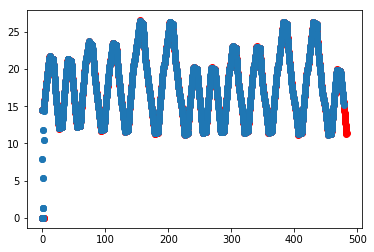

In [40]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
import numpy as np
from scipy import interpolate
import pylab as pl
 
x = ForceData["cstm"][1:].values
y = ForceData["cssj"][1:].values

xnew = ForceData["cstm"][1:len(SensorData)].values.astype(float)*1.272
pl.plot(x,y,"ro")
 
f=interpolate.interp1d(x,y)
ynew=f(xnew)
pl.plot(xnew,ynew,'o')
pl.show()

In [44]:
    #assign data
trace0 = go.Scattergl(
        x = ynew[30:],
        y = SensorData[20:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data = [trace0]

iplot(data, filename='scatter')

In [65]:
#assign data
x = ynew[30:]
y = SensorData[20:]
x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(x)-1
              ):
        if (x[i] < x[i+1] and y[i] < y[i+1]
        ):
            x1.append[x[i+1]]
            y1.append[y[i+1]]
        else: 
            x2.append[x[i+1]]
            y2.append[y[i+1]]
trace3 = go.Scattergl(
        x1,y1,
        name ="xy",
        mode = 'markers',
        marker=dict(
                size=2,
                color = red
                )
)
trace4 = go.Scattergl(
        x2,y2,
        name ="xy",
        mode = 'markers',
        marker=dict(
                size=2,
                color = blue
                )
)
data = [trace3,trace4]

iplot(data, filename='scatter')

TypeError: 'builtin_function_or_method' object is not subscriptable

In [55]:
len(x)

2429

In [42]:
len(ynew[])

SyntaxError: invalid syntax (<ipython-input-42-32abec9c6ff2>, line 1)

In [66]:
trace0 = go.Scattergl(
        x = ynew[30:],
        y = SensorData[20:],
        name ="xy",
        mode = 'lines',
        line=dict(
            width=1, color='blue'
        )
)
data2 = [trace0,trace0]

layout2=dict(
            title='Anime Test', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

M = (len(SensorData)-30)//10
x2 = ynew[30::10]
y2 = SensorData[20::10]
frames2=[dict(data=[dict(x=[x2[k]], 
                        y=[y2[k]], 
                        mode='markers', 
                        marker=dict(color='red', size=10)
                        )
                  ]) for k in range(M)]  

# steps = []
# for i in range(len(data)):
#     step = dict(
#         method = 'restyle',  
#         args = ['visible', [False] * len(data)],
#     )
#     step['args'][1][i] = True # Toggle i'th trace to "visible"
#     steps.append(step)

# sliders = [dict(
#     active = 10,
#     currentvalue = {"prefix": "Frequency: "},
#     pad = {"t": 50},
#     steps = steps
# )]
# layout = dict(sliders=sliders)
# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='Sine Wave Slider')

figure2 = dict(data=data2, layout=layout2, frames=frames2)
iplot(figure2, filename='Animation')